In [13]:
from rebalancer.rebalancer import Rebalancer, CexDataLoader, TopNEqualDollarStrategy, DynamicEWMAStrategy
from logger.logger import Logger

In [14]:
loader = CexDataLoader("binance")
symbols = loader.get_top_volume_symbols(50)
data    = loader.fetch_history(symbols, since="2024-05-10T00:00:00Z")

2025-05-14 19:35:57,063 - cex_binance - INFO - Wrapper for Binance initialized
2025-05-14 19:36:00,536 - cex_binance - INFO - Loaded 370 rows from cache /Users/denis/Desktop/marvel_tt/data/ETHUSDT_1d.parquet
2025-05-14 19:36:00,537 - cex_binance - INFO - Fetched 370 bars for ETH/USDT 1d (from 2024-05-10 to 2025-05-14)
2025-05-14 19:36:00,538 - cex_binance - INFO - Loaded 370 rows from cache /Users/denis/Desktop/marvel_tt/data/BTCUSDT_1d.parquet
2025-05-14 19:36:00,538 - cex_binance - INFO - Fetched 370 bars for BTC/USDT 1d (from 2024-05-10 to 2025-05-14)
2025-05-14 19:36:00,540 - cex_binance - INFO - Loaded 370 rows from cache /Users/denis/Desktop/marvel_tt/data/SOLUSDT_1d.parquet
2025-05-14 19:36:00,540 - cex_binance - INFO - Fetched 370 bars for SOL/USDT 1d (from 2024-05-10 to 2025-05-14)
2025-05-14 19:36:00,542 - cex_binance - INFO - Loaded 370 rows from cache /Users/denis/Desktop/marvel_tt/data/XRPUSDT_1d.parquet
2025-05-14 19:36:00,542 - cex_binance - INFO - Fetched 370 bars for X

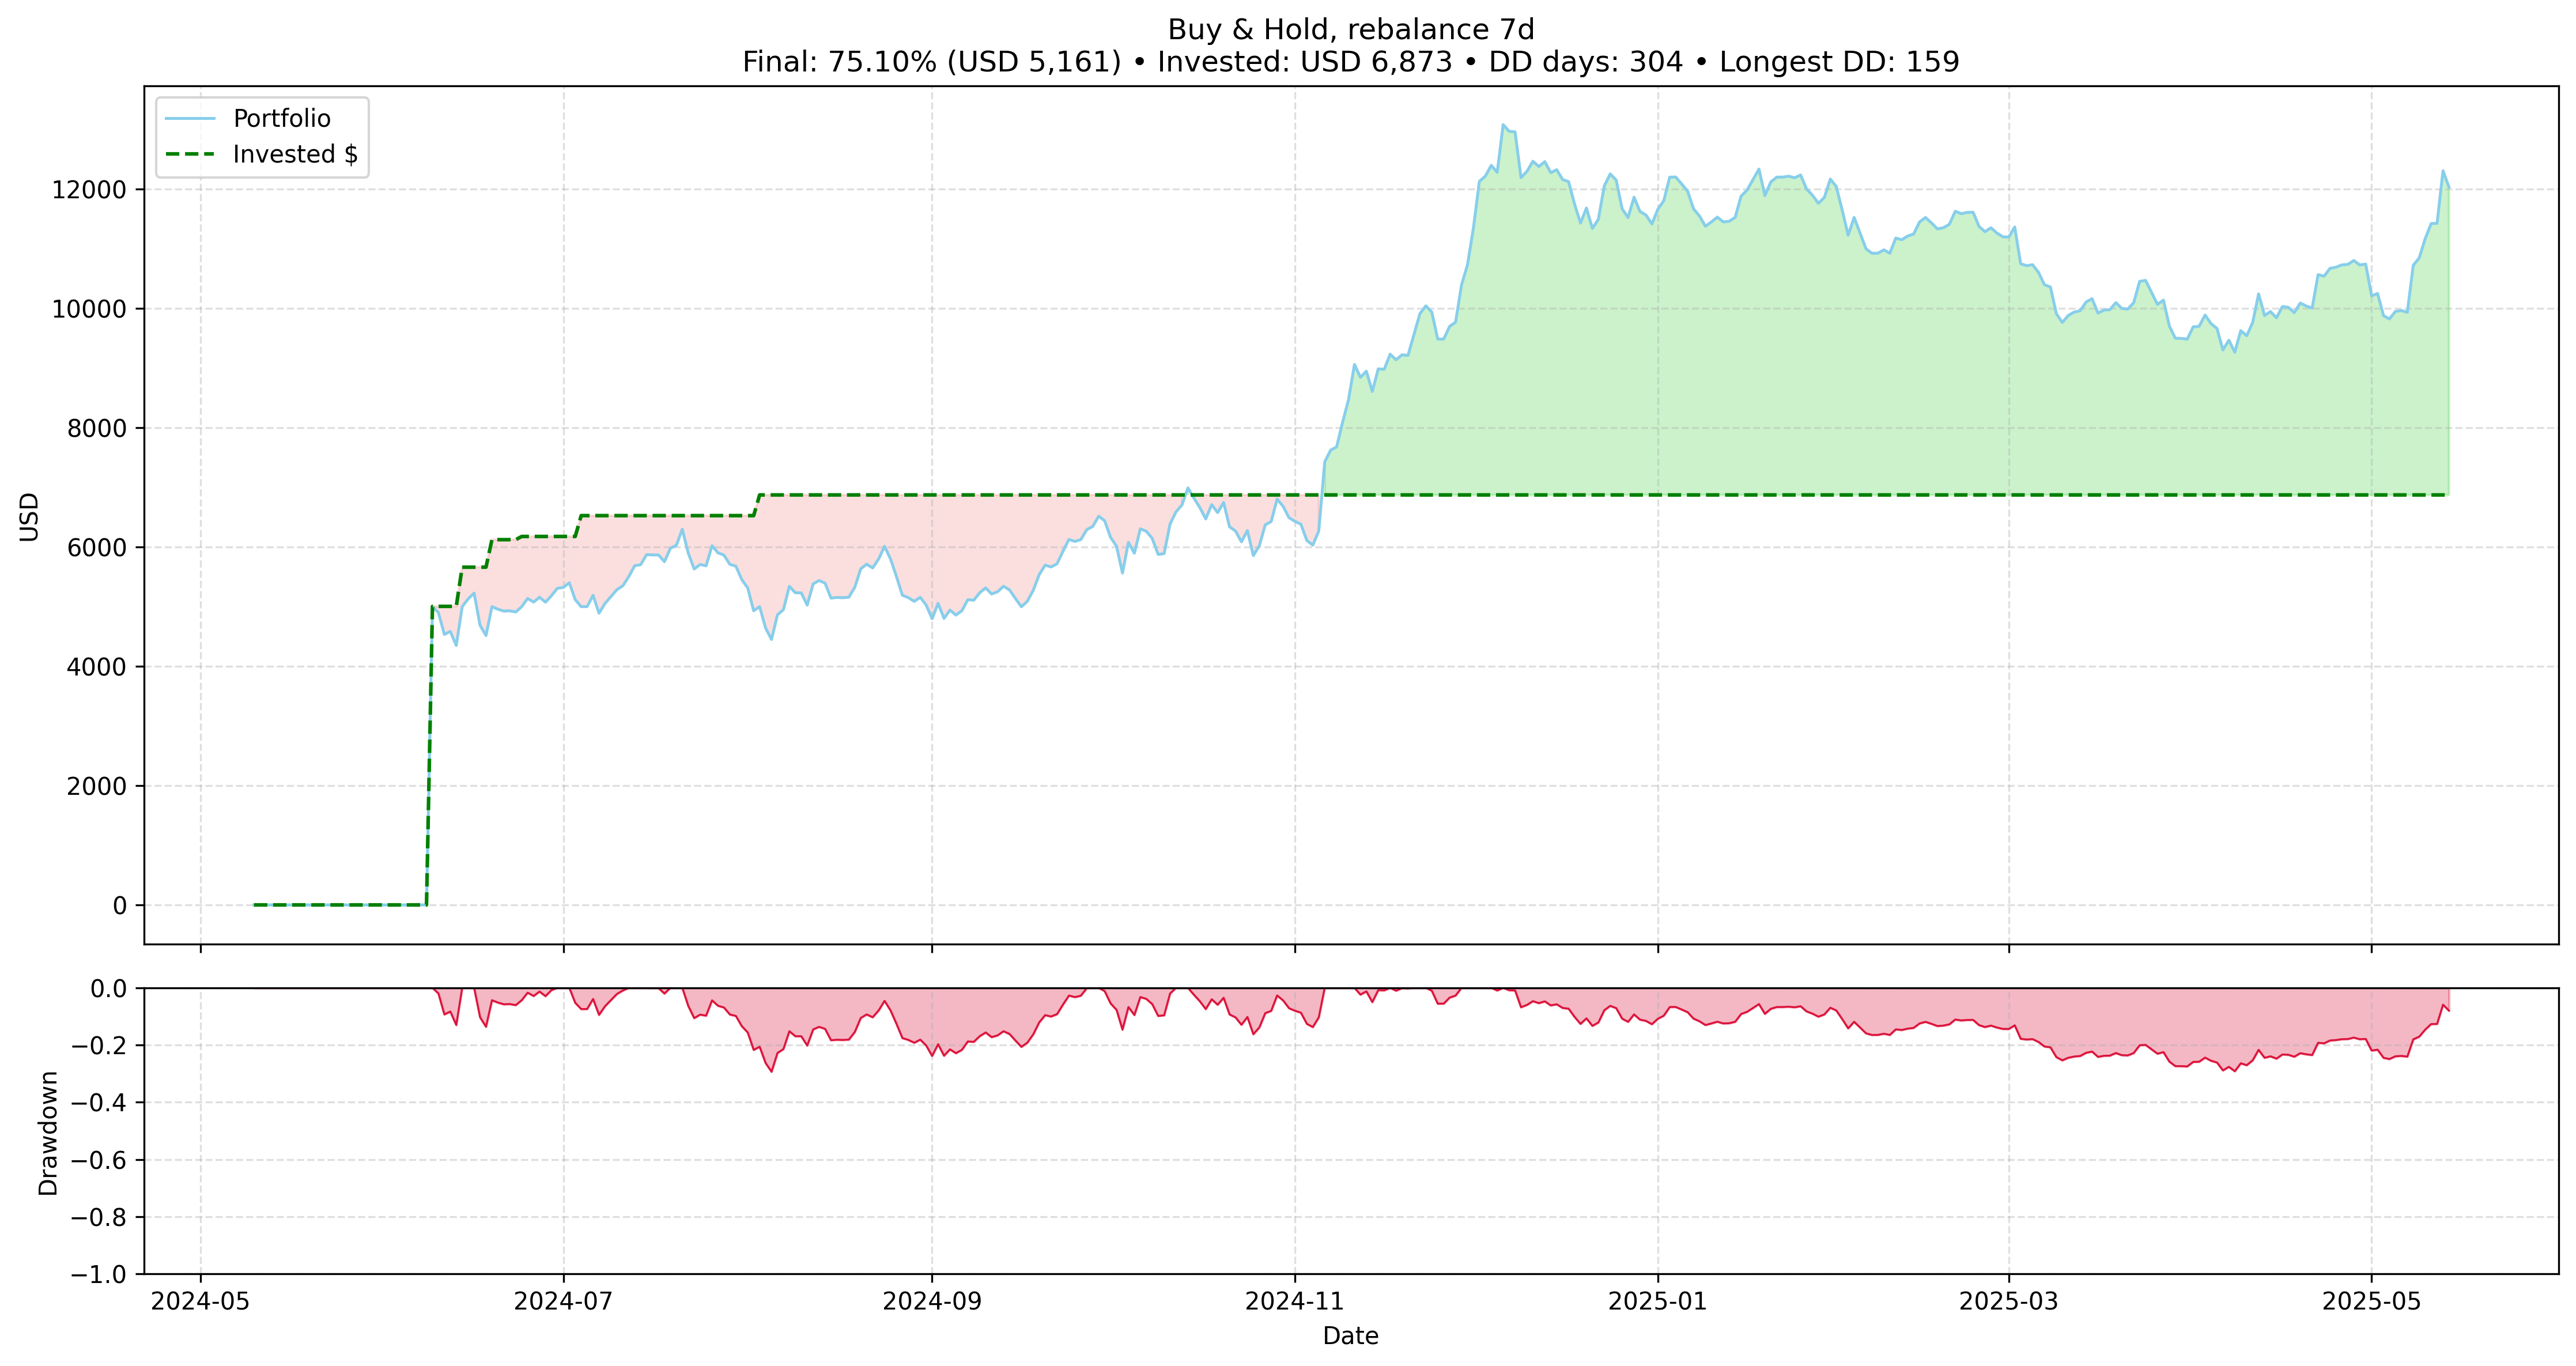

Final return      : 75.10% (USD 5,161)
Total invested    : USD 6,873
Time in drawdown  : 304 trading days
Longest DD period : 159 trading days

TOP gainers, USD
RAY/USDT     1,448.11
CRV/USDT     1,357.22
DOGE/USDT    1,350.16
XRP/USDT     1,011.36
HBAR/USDT      975.98
dtype: object

TOP losers, USD
ALPACA/USDT    -979.58
PEOPLE/USDT    -666.77
ENA/USDT       -621.73
ORDI/USDT      -500.81
FLOKI/USDT     -283.80
dtype: object

Traded volume, USD: 271,065.43


In [15]:
strategy = TopNEqualDollarStrategy(n_top=5, usd_per_strat=1_000)
rb  = Rebalancer(data, strategy, lookback_days=30,
                      rebalance_freq_days=5, fee_rate=0.001)
result = rb.run()    
Rebalancer.plot_equity(result.equity_curve, result.invested_curve,"Buy & Hold, rebalance 7d")
Rebalancer.report_top_movers(result.total_pnl, result.traded_volume)

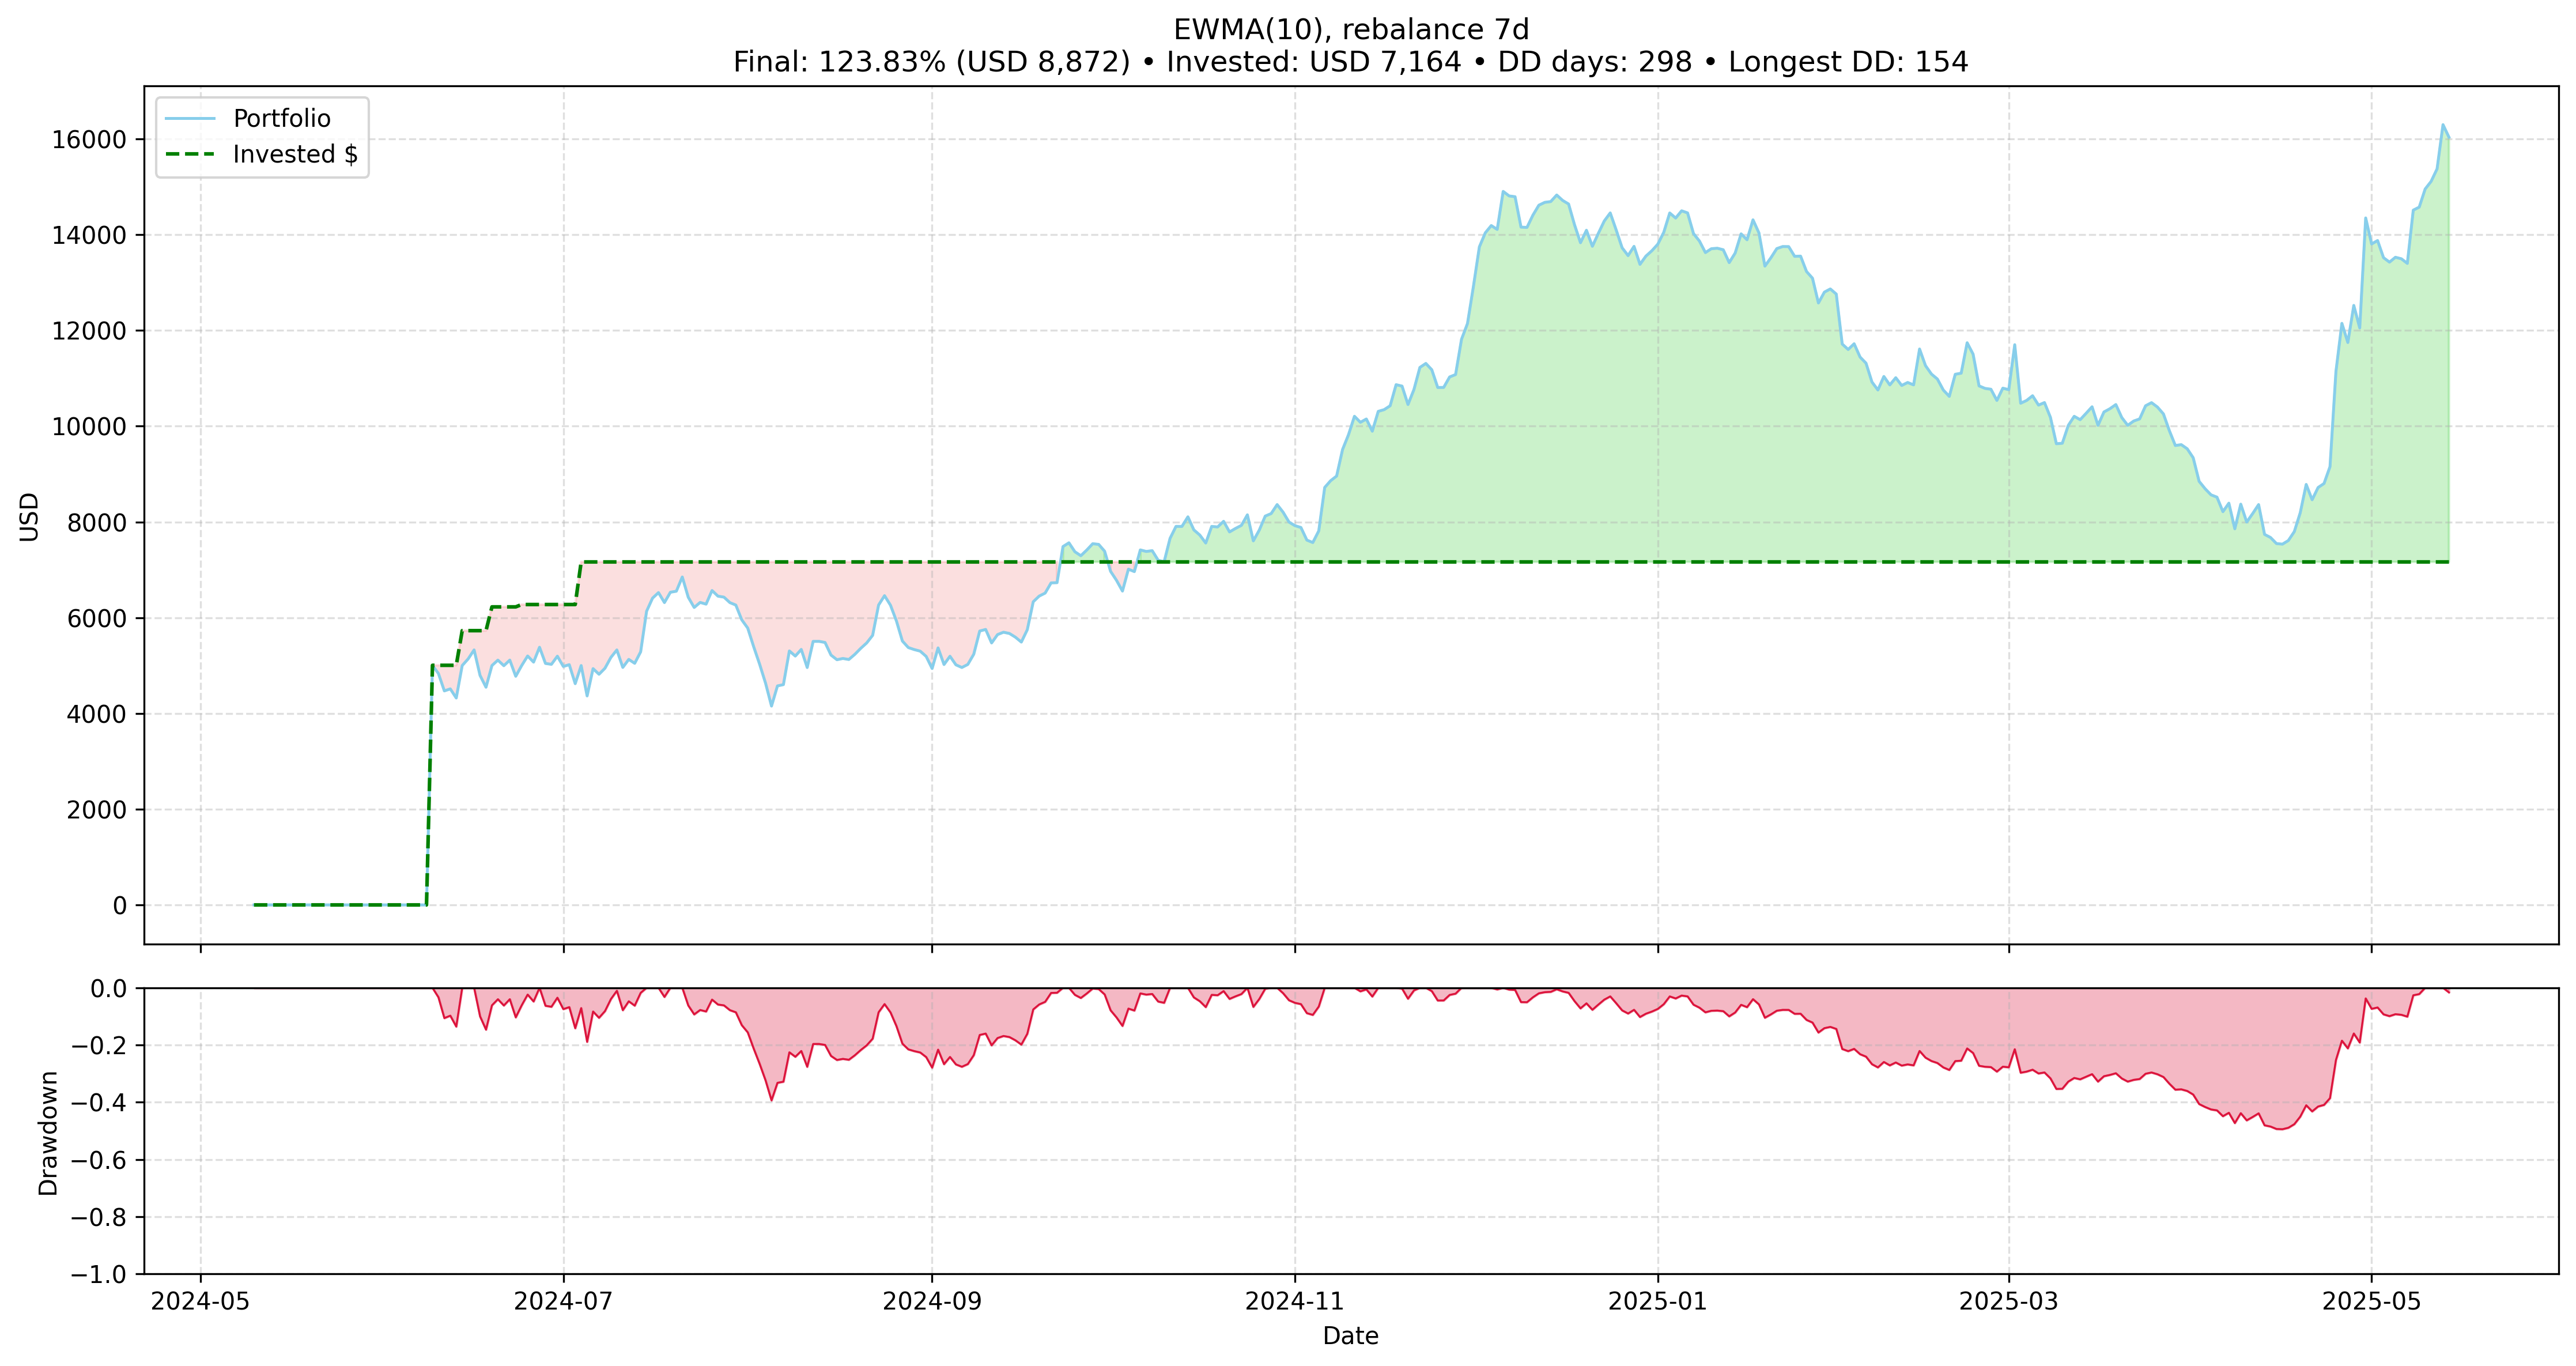

Final return      : 123.83% (USD 8,872)
Total invested    : USD 7,164
Time in drawdown  : 298 trading days
Longest DD period : 154 trading days

TOP gainers, USD
ALPACA/USDT    3,857.23
HBAR/USDT      1,522.09
TAO/USDT       1,319.67
DOGE/USDT      1,272.66
WIF/USDT         877.11
dtype: object

TOP losers, USD
RUNE/USDT        -982.38
BOME/USDT        -940.33
1000SATS/USDT    -710.02
MEME/USDT        -463.83
FLOKI/USDT       -366.12
dtype: object

Traded volume, USD: 357,106.41


In [21]:
strategy = DynamicEWMAStrategy(n_top=5, usd_per_strat=1_000, span=25)
rb = Rebalancer(data, strategy, lookback_days=30,
                      rebalance_freq_days=5, fee_rate=0.001)
result = rb.run()    
Rebalancer.plot_equity(result.equity_curve, result.invested_curve,"EWMA(10), rebalance 7d")
Rebalancer.report_top_movers(result.total_pnl, result.traded_volume)